In [116]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [120]:
cd /Users/pranathiiyer/Documents/democracy/USUKRUSITA_Files

/Users/pranathiiyer/Documents/democracy/USUKRUSITA_Files


In [124]:
def get_cos_plot(country_name, n):
    """
    Return a plot three word lists' cosine
    similarity to democracy across all years, given a
    string of country abbreviation.
    """
    
    for aspect in ['econ', 'ide', 'gov']:
        # read csv
        econ = pd.read_csv('{}_cos_{}.csv'.format(aspect, country_name), index_col=0)
        # clean data
        econ = clean_df(econ, aspect)
        if len(econ.columns) > 1:
            econ['Econ'] = econ[econ.columns[1]].rolling(n).mean()
            if aspect == 'econ':
                econ.drop(columns='econ', inplace=True)
            
        else:
            econ['rolling_avg'] = econ[econ.columns[0]].rolling(n).mean()
    
        if aspect == 'econ':
            total = econ
        else:
            total[aspect] = econ['rolling_avg']

    total = total.set_index('year')

    sns.set_style("darkgrid")
    g = sns.lineplot(data=total)
    g.figure.set_size_inches(10, 6)
    g.set_title('{}: Cosine Similiarty between Three Word List and Democracy'.format(country_name))

In [125]:
def clean_df(df, aspect):
    """
    A helper function that convert str values in a dataframe
    to float.
    """
    df['cosine_similarity']= df['cosine_similarity'].apply(lambda x: x[2:8])  
    df.replace("", 0, inplace=True)
    df['{}'.format(aspect)] = df['cosine_similarity'].astype('float')
    df = df.sort_values(by='year')
    if aspect != 'econ':
        df.drop(columns=['cosine_similarity', 'year'], inplace=True)
    else:
        df.drop(columns=['cosine_similarity'], inplace=True)
    return df

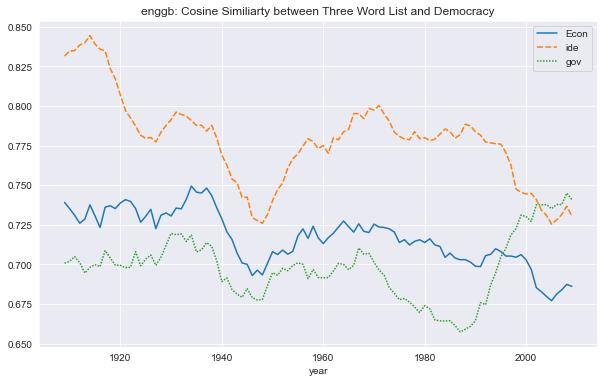

In [126]:
get_cos_plot('enggb',10)

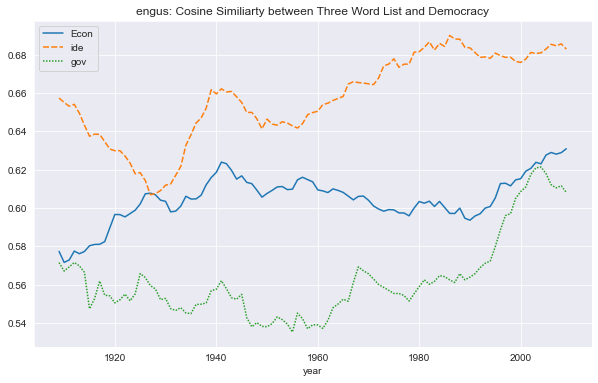

In [110]:
get_cos_plot('engus', 10)

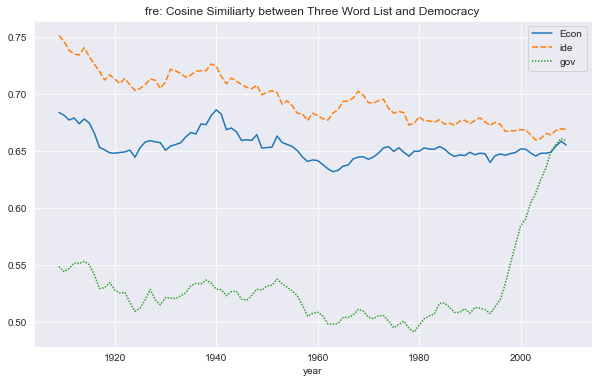

In [111]:
get_cos_plot('fre', 10)

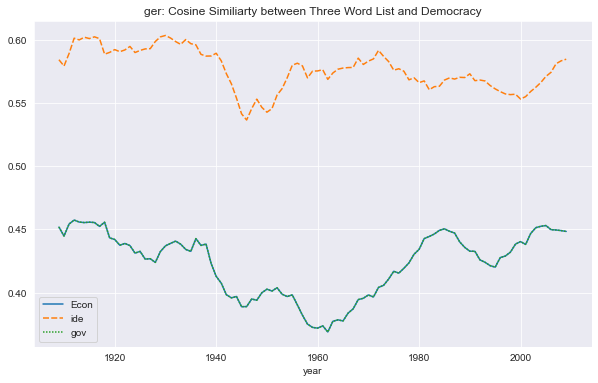

In [112]:
get_cos_plot('ger', 10)

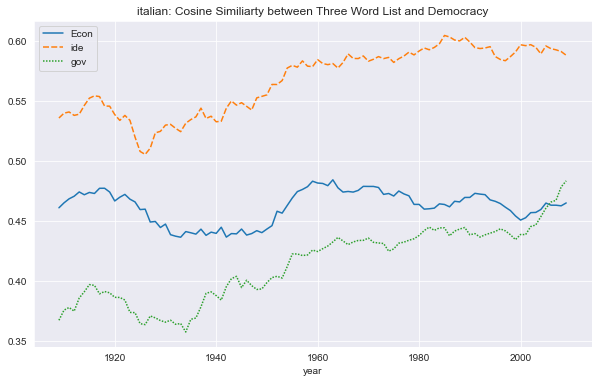

In [113]:
get_cos_plot('italian', 10)

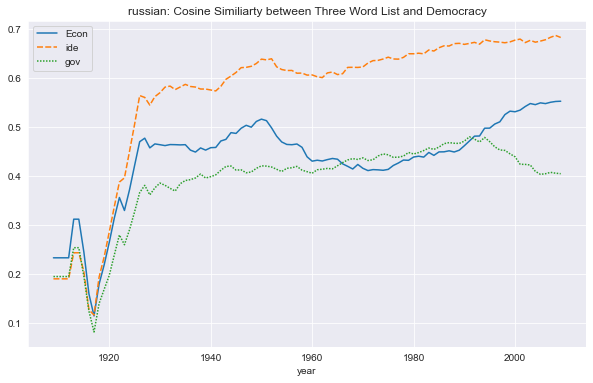

In [114]:
get_cos_plot('russian', 10)

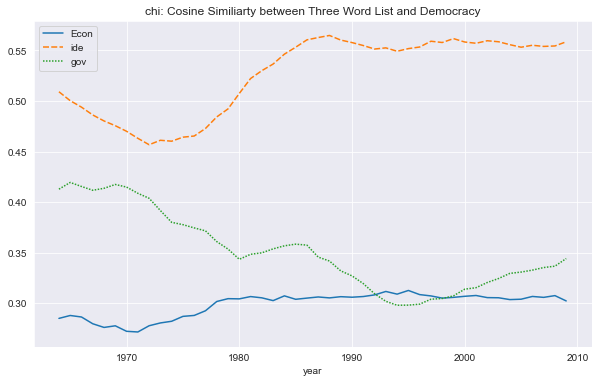

In [115]:
get_cos_plot('chi', 10)

In [175]:
def get_time_series_plot(country_name):
    """
    Return a plot of econ words cosine similarity
    and GDP.
    """
    
    for aspect in ['econ', 'ide', 'gov']:
        # read csv
        econ = pd.read_csv('{}_cos_{}.csv'.format(aspect, country_name), index_col=0)
        # clean data
        econ = clean_df(econ, aspect)
        if aspect == 'econ':
            total = econ
        else:
            total[aspect] = econ[aspect]

    total = total.set_index('year')
    data = pd.read_csv('../{}'.format(country_name))
    time_series = total.merge(data, on='year', how='right')
    time_series.set_index('year', inplace=True)
    
    fig, ax = plt.subplots()
    ax.plot(time_series['GDP per capita growth (annual %)'], color='red', label='GDP')
    ax.tick_params(axis='y', labelcolor='red')
    ax.legend()
    ax2 = ax.twinx()
    ax2.plot(time_series['econ'], color='green', label='econ cosine')
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.legend()

    plt.legend()
    plt.title('{}: Time Series: GDP per capital growth and Cosine Simiarlity with Econ Words'.format(country_name))
    plt.show()
    

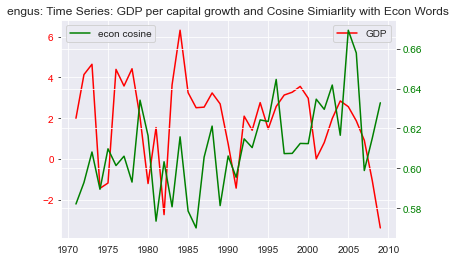

In [176]:
get_time_series_plot('engus')

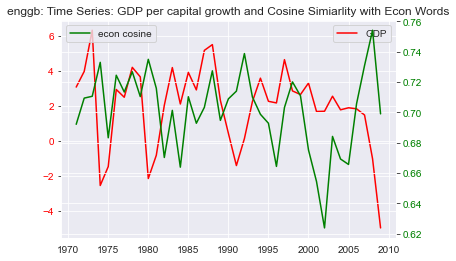

In [177]:
get_time_series_plot('enggb')

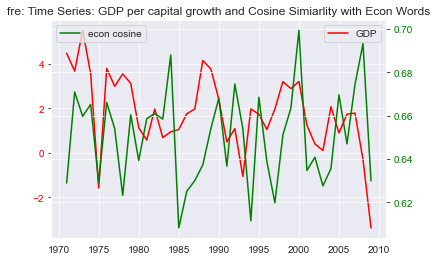

In [178]:
get_time_series_plot('fre')

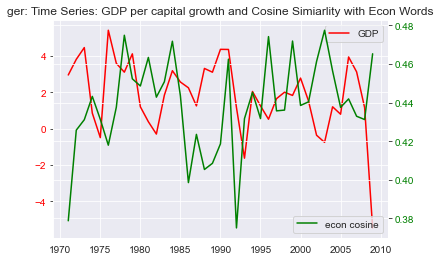

In [179]:
get_time_series_plot('ger')

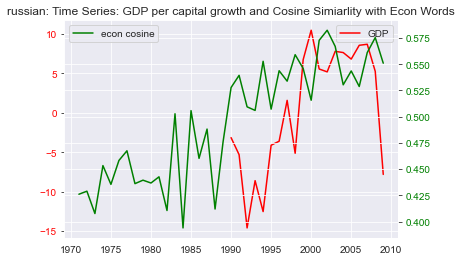

In [180]:
get_time_series_plot('russian')

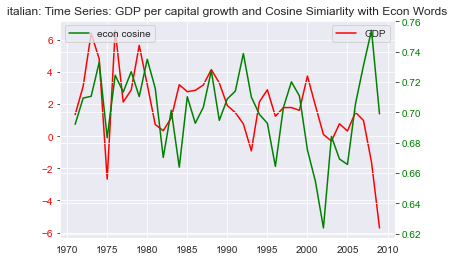

In [350]:
get_time_series_plot('italian')

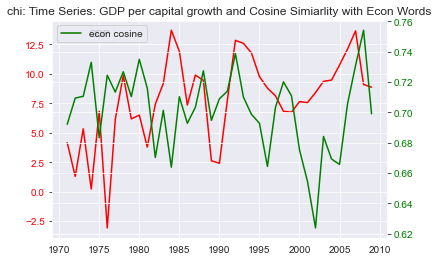

In [352]:
get_time_series_plot('chi')